In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
############
# Dask
############
from dask_jobqueue import PBSCluster

cluster = PBSCluster(
    cores=1,
    memory="10GB",
    resource_spec="pmem=40GB",
    # account='open',
    worker_extra_args=["#PBS -l feature=rhel7"],
    walltime="00:30:00",
)

cluster.scale(jobs=10)  # ask for jobs

from dask.distributed import Client

client = Client(cluster)

client

<Client: 'tcp://10.102.201.238:45667' processes=0 threads=0, memory=0 B>

## Effects of different climate obs

In [3]:
path_in = "/gpfs/group/kaf26/default/dcl5300/test-runs_WBM/current/"
year="*"

ds_livneh = xr.open_mfdataset(path_in + "Livneh_soilM_HamonTP_cropAverage/wbm_output/daily/wbm_" + year + ".nc")
ds_gmfd = xr.open_mfdataset(path_in + "GMFD_soilM_HamonTP_cropAverage/wbm_output/daily/wbm_" + year + ".nc")
ds_prism = xr.open_mfdataset(path_in + "PRISM_soilM_HamonTP_cropAverage/wbm_output/daily/wbm_" + year + ".nc")
ds_gridmet = xr.open_mfdataset(path_in + "gridMET_soilM_HamonTP_cropAverage/wbm_output/daily/wbm_" + year + ".nc")

### Timeseries plots

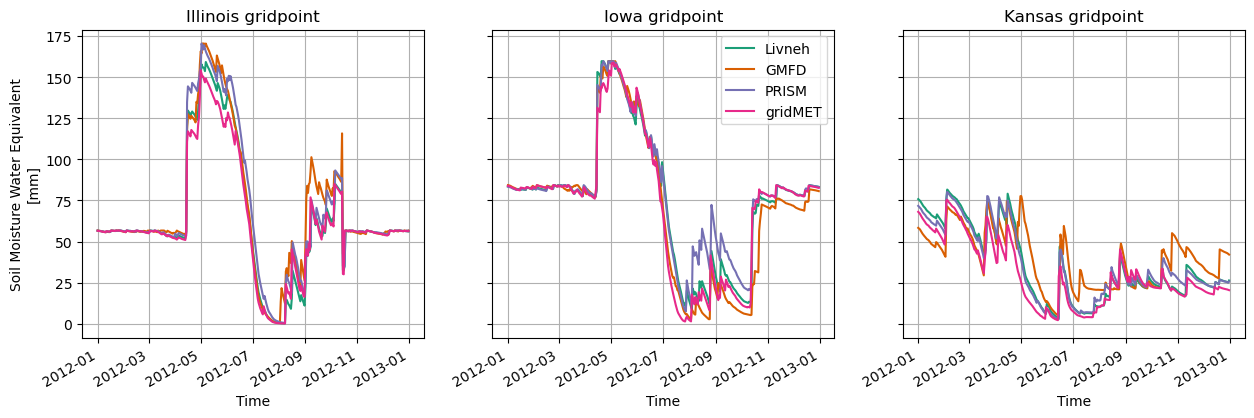

In [8]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

var_id = "soilMoist"

fig, axs = plt.subplots(1,3, figsize=(15,4), sharey=True)

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

# Illinois
ax=axs[0]
lat_sel = 39.61
lon_sel = -87.96
ds_livneh.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Livneh', color=colors[0], ax=ax)
ds_gmfd.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='GMFD', color=colors[1], ax=ax)
ds_prism.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PRISM', color=colors[2], ax=ax)
ds_gridmet.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='gridMET', color=colors[3], ax=ax)
ax.set_title("Illinois gridpoint")

# Iowa
ax=axs[1]
lat_sel = 41.5
lon_sel = -92.5

ds_livneh.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Livneh', color=colors[0], ax=ax)
ds_gmfd.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='GMFD', color=colors[1], ax=ax)
ds_prism.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PRISM', color=colors[2], ax=ax)
ds_gridmet.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='gridMET', color=colors[3], ax=ax)
ax.legend()
ax.set_title("Iowa gridpoint")
ax.set_ylabel("")

# Kansas
ax=axs[2]
lat_sel = 38.8
lon_sel = -98.32

ds_livneh.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Livneh', color=colors[0], ax=ax)
ds_gmfd.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='GMFD', color=colors[1], ax=ax)
ds_prism.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PRISM', color=colors[2], ax=ax)
ds_gridmet.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='gridMET', color=colors[3], ax=ax)
ax.set_title("Kansas gridpoint")
ax.set_ylabel("")

for ax in axs:
    ax.grid()
    
    
plt.savefig('./figs/timeseries_IL-IA-KS_2012_Hamon_ClimCompare.pdf')

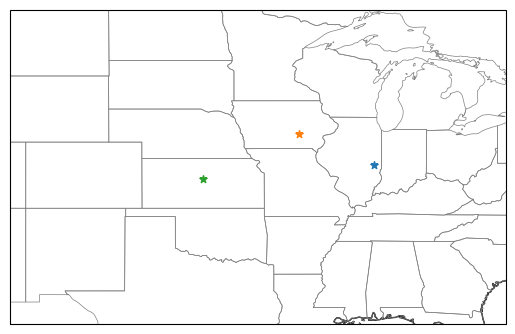

In [35]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

xlims = [-110, -80] # central US
ylims = [30,49] # central US
ax.set_xlim(xlims)
ax.set_ylim(ylims)

ax.scatter([-87.96], [39.61], s=30, marker="*") # IL
ax.scatter([-92.5], [41.5], s=30, marker="*") # IA
ax.scatter([-98.33], [38.79], s=30, marker="*") # KS

plt.savefig('./figs/map_IL-IA-KS.pdf')
# plt.show()

### Correlation analysis

In [10]:
# Correlation analysis
var_id = "soilMoist"

ds_gmfd_gridmet_corr = xr.corr(ds_gmfd[var_id], ds_gridmet[var_id], dim="time").compute()
ds_gmfd_prism_corr = xr.corr(ds_gmfd[var_id], ds_prism[var_id], dim="time").compute()
ds_gmfd_livneh_corr = xr.corr(ds_gmfd[var_id], ds_livneh[var_id], dim="time").compute()

ds_prism_gridmet_corr = xr.corr(ds_prism[var_id], ds_gridmet[var_id], dim="time").compute()
ds_prism_livneh_corr = xr.corr(ds_prism[var_id], ds_livneh[var_id], dim="time").compute()

ds_livneh_gridmet_corr = xr.corr(ds_livneh[var_id], ds_gridmet[var_id], dim="time").compute()

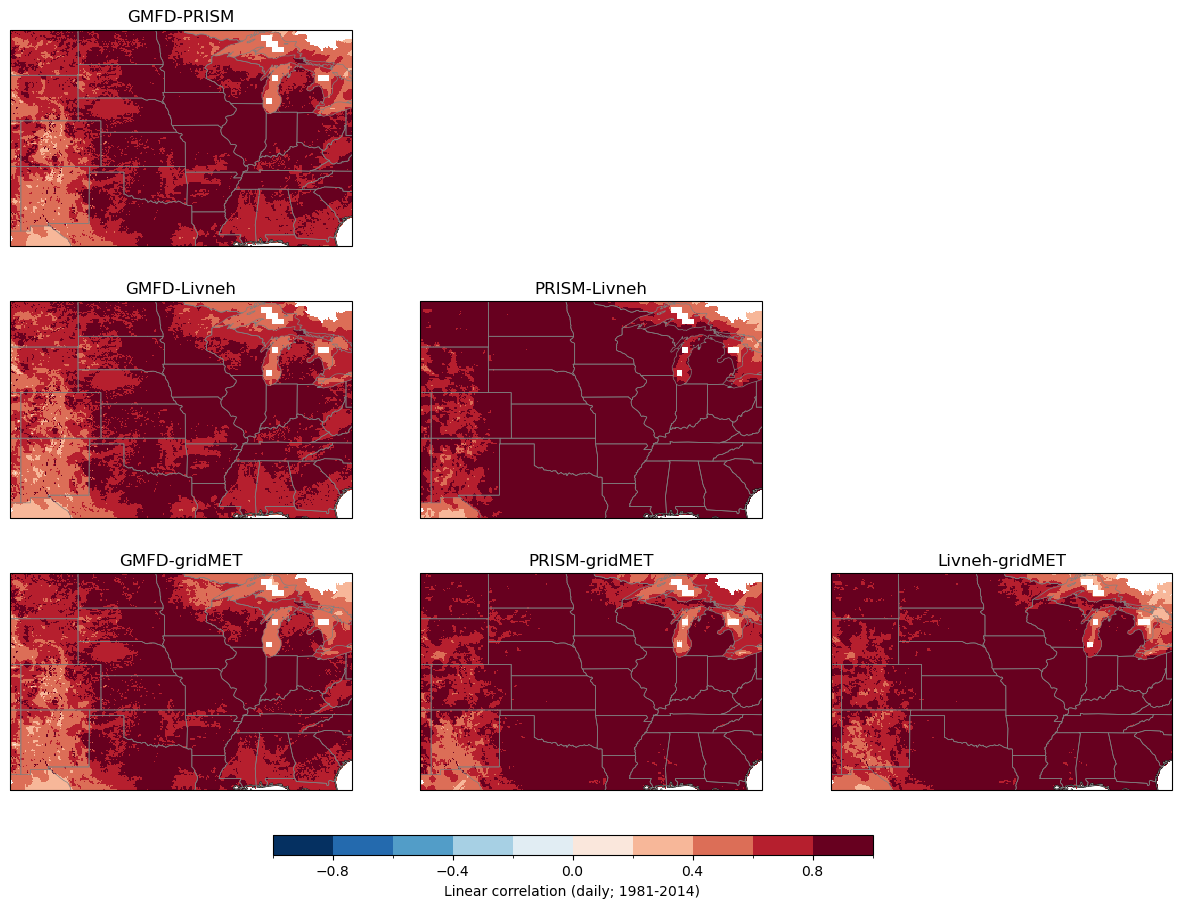

In [24]:
# Plot
fig, axs = plt.subplots(3,3, figsize=(15,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

xlims = [-110, -80] # central US
ylims = [30,49] # central US

ds_gmfd_prism_corr.plot(ax=axs[0,0], vmin=-1, vmax=1, cmap="RdBu_r", add_colorbar=False, levels=11)
axs[0,0].set_title("GMFD-PRISM")

ds_gmfd_livneh_corr.plot(ax=axs[1,0], vmin=-1, vmax=1, cmap="RdBu_r", add_colorbar=False, levels=11)
axs[1,0].set_title("GMFD-Livneh")

ds_gmfd_gridmet_corr.plot(ax=axs[2,0], vmin=-1, vmax=1, cmap="RdBu_r", add_colorbar=False, levels=11)
axs[2,0].set_title("GMFD-gridMET")

ds_prism_livneh_corr.plot(ax=axs[1,1], vmin=-1, vmax=1, cmap="RdBu_r", add_colorbar=False, levels=11)
axs[1,1].set_title("PRISM-Livneh")

ds_prism_gridmet_corr.plot(ax=axs[2,1], vmin=-1, vmax=1, cmap="RdBu_r", add_colorbar=False, levels=11)
axs[2,1].set_title("PRISM-gridMET")

p=ds_livneh_gridmet_corr.plot(ax=axs[2,2], vmin=-1, vmax=1, cmap="RdBu_r", add_colorbar=False, levels=11)
axs[2,2].set_title("Livneh-gridMET")

for ax in [axs[0,0],axs[1,0],axs[2,0],axs[1,1],axs[2,1],axs[2,2]]:
    ax.coastlines()
    ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,2].axis('off')

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
cbar = fig.colorbar(p,
                    cax=cbar_ax,
                    orientation="horizontal",
                    label="Linear correlation (daily; 1981-2014)")

plt.savefig('./figs/pearson_GMFD-PRISM-gridMET_1981-2014_Hamon_midwest.png', dpi=600)
# plt.show()

### RMSE analysis

In [23]:
%%time
# RMSE analysis
var_id = "soilMoist"

ds_gmfd_gridmet_rmse = np.sqrt(((ds_gmfd[var_id] - ds_gridmet[var_id])**2)).mean(dim="time").compute()
ds_gmfd_prism_rmse = np.sqrt(((ds_gmfd[var_id] - ds_prism[var_id])**2)).mean(dim="time").compute()
ds_gmfd_livneh_rmse = np.sqrt(((ds_gmfd[var_id] - ds_livneh[var_id])**2)).mean(dim="time").compute()

ds_prism_gridmet_rmse = np.sqrt(((ds_prism[var_id] - ds_gridmet[var_id])**2)).mean(dim="time").compute()
ds_prism_livneh_rmse = np.sqrt(((ds_prism[var_id] - ds_livneh[var_id])**2)).mean(dim="time").compute()

ds_livneh_gridmet_rmse = np.sqrt(((ds_livneh[var_id] - ds_gridmet[var_id])**2)).mean(dim="time").compute()

CPU times: user 14.9 s, sys: 735 ms, total: 15.7 s
Wall time: 2min 26s


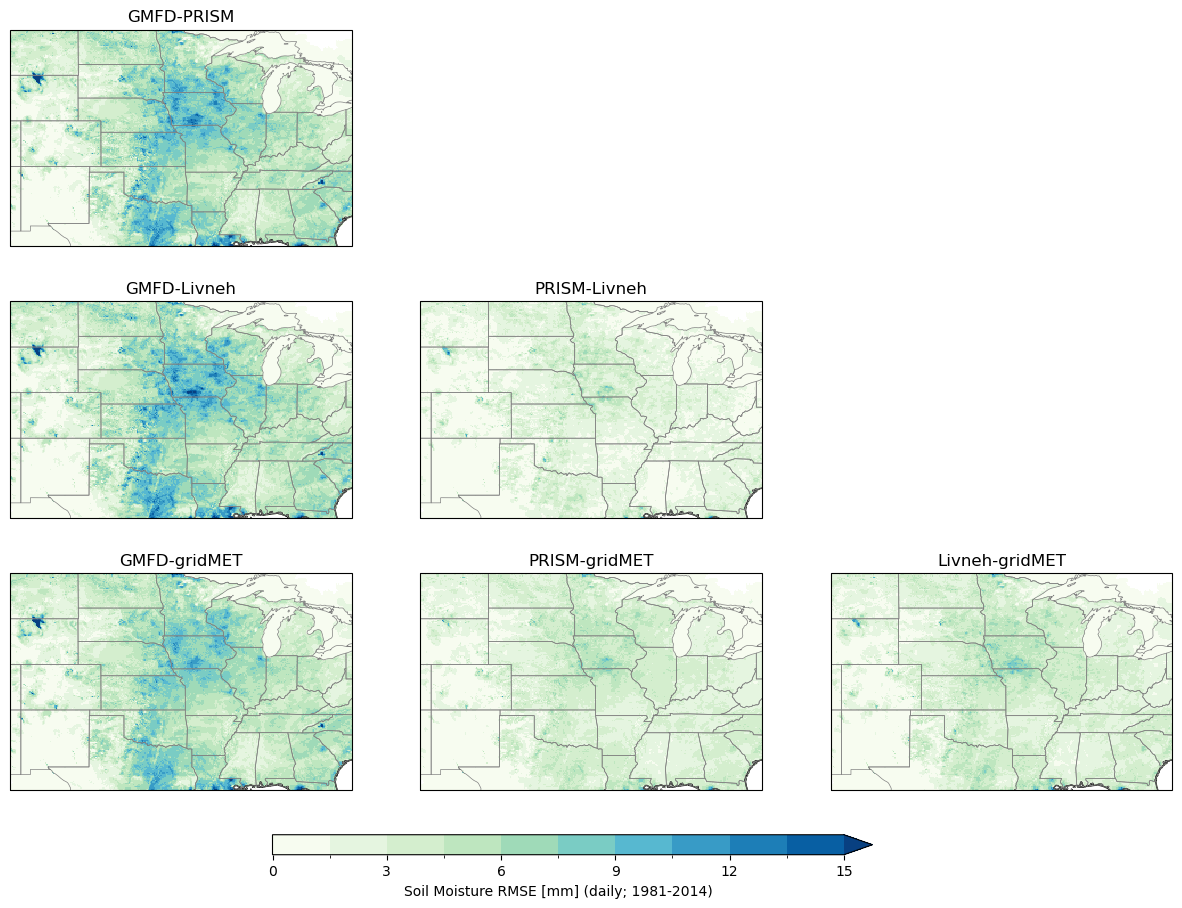

In [25]:
# Plot
fig, axs = plt.subplots(3,3, figsize=(15,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

xlims = [-110, -80] # central US
ylims = [30,49] # central US

ds_gmfd_prism_rmse.plot(ax=axs[0,0], vmin=0, vmax=15, cmap="GnBu", add_colorbar=False, levels=11)
axs[0,0].set_title("GMFD-PRISM")

ds_gmfd_livneh_rmse.plot(ax=axs[1,0], vmin=0, vmax=15, cmap="GnBu", add_colorbar=False, levels=11)
axs[1,0].set_title("GMFD-Livneh")

ds_gmfd_gridmet_rmse.plot(ax=axs[2,0], vmin=0, vmax=15, cmap="GnBu", add_colorbar=False, levels=11)
axs[2,0].set_title("GMFD-gridMET")

ds_prism_livneh_rmse.plot(ax=axs[1,1], vmin=0, vmax=15, cmap="GnBu", add_colorbar=False, levels=11)
axs[1,1].set_title("PRISM-Livneh")

ds_prism_gridmet_rmse.plot(ax=axs[2,1], vmin=0, vmax=15, cmap="GnBu", add_colorbar=False, levels=11)
axs[2,1].set_title("PRISM-gridMET")

p=ds_livneh_gridmet_rmse.plot(ax=axs[2,2], vmin=0, vmax=15, cmap="GnBu", add_colorbar=False, levels=11)
axs[2,2].set_title("Livneh-gridMET")

for ax in [axs[0,0],axs[1,0],axs[2,0],axs[1,1],axs[2,1],axs[2,2]]:
    ax.coastlines()
    ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,2].axis('off')

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
cbar = fig.colorbar(p,
                    cax=cbar_ax,
                    orientation="horizontal",
                    label="Soil Moisture RMSE [mm] (daily; 1981-2014)")

plt.savefig('./figs/RMSE_GMFD-PRISM-gridMET_1981-2014_Hamon_midwest.png', dpi=600)
# plt.show()

### Binary differences

In [27]:
%%time
# Above/below instances
var_id = "soilMoist"

ds_gmfd_gridmet_bin = (ds_gmfd[var_id] > ds_gridmet[var_id]).where(ds_gmfd[var_id] != ds_gridmet[var_id]).mean(dim="time").compute()
ds_gmfd_prism_bin = (ds_gmfd[var_id] > ds_prism[var_id]).where(ds_gmfd[var_id] != ds_prism[var_id]).mean(dim="time").compute()
ds_gmfd_livneh_bin = (ds_gmfd[var_id] > ds_livneh[var_id]).where(ds_gmfd[var_id] != ds_livneh[var_id]).mean(dim="time").compute()

ds_prism_gridmet_bin = (ds_prism[var_id] > ds_gridmet[var_id]).where(ds_prism[var_id] != ds_gridmet[var_id]).mean(dim="time").compute()
ds_prism_livneh_bin = (ds_prism[var_id] > ds_livneh[var_id]).where(ds_prism[var_id] != ds_livneh[var_id]).mean(dim="time").compute()

ds_livneh_gridmet_bin = (ds_livneh[var_id] > ds_gridmet[var_id]).where(ds_livneh[var_id] != ds_gridmet[var_id]).mean(dim="time").compute()

CPU times: user 16.1 s, sys: 900 ms, total: 17 s
Wall time: 2min 38s


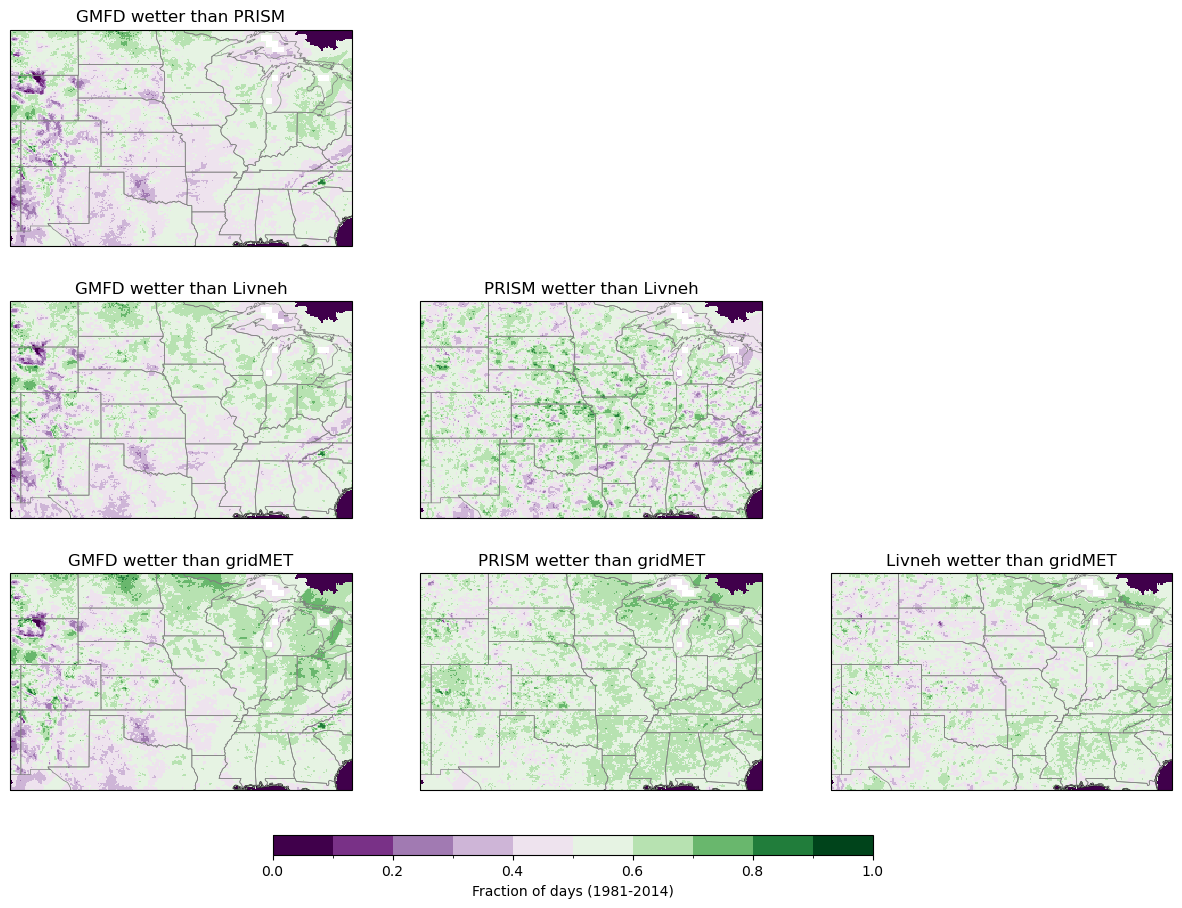

In [28]:
# Plot
fig, axs = plt.subplots(3,3, figsize=(15,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

xlims = [-110, -80] # central US
ylims = [30,49] # central US

ds_gmfd_prism_bin.plot(ax=axs[0,0], vmin=0., vmax=1., cmap="PRGn", add_colorbar=False, levels=11)
axs[0,0].set_title("GMFD wetter than PRISM")

ds_gmfd_livneh_bin.plot(ax=axs[1,0], vmin=0., vmax=1., cmap="PRGn", add_colorbar=False, levels=11)
axs[1,0].set_title("GMFD wetter than Livneh")

ds_gmfd_gridmet_bin.plot(ax=axs[2,0], vmin=0., vmax=1., cmap="PRGn", add_colorbar=False, levels=11)
axs[2,0].set_title("GMFD wetter than gridMET")

ds_prism_livneh_bin.plot(ax=axs[1,1], vmin=0., vmax=1., cmap="PRGn", add_colorbar=False, levels=11)
axs[1,1].set_title("PRISM wetter than Livneh")

ds_prism_gridmet_bin.plot(ax=axs[2,1], vmin=0., vmax=1., cmap="PRGn", add_colorbar=False, levels=11)
axs[2,1].set_title("PRISM wetter than gridMET")

p=ds_livneh_gridmet_bin.plot(ax=axs[2,2], vmin=0., vmax=1., cmap="PRGn", add_colorbar=False, levels=11)
axs[2,2].set_title("Livneh wetter than gridMET")

for ax in [axs[0,0],axs[1,0],axs[2,0],axs[1,1],axs[2,1],axs[2,2]]:
    ax.coastlines()
    ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,2].axis('off')

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
cbar = fig.colorbar(p,
                    cax=cbar_ax,
                    orientation="horizontal",
                    label="Fraction of days (1981-2014)")

plt.savefig('./figs/ranking_GMFD-PRISM-gridMET_1981-2014_Hamon_midwest.png', dpi=600)
# plt.show()

## Effects of crop settings (averaging vs individual)

In [2]:
path_in = "/gpfs/group/kaf26/default/dcl5300/test-runs_WBM/current/"
year="*"

ds_prism_avg = xr.open_mfdataset(path_in + "PRISM_soilM_HamonTP_cropAverage/wbm_output/daily/wbm_" + year + ".nc")
ds_prism_ind = xr.open_mfdataset(path_in + "PRISM_soilM_HamonTP_cropIndividual/wbm_output/daily/wbm_" + year + ".nc")

### Timeseries

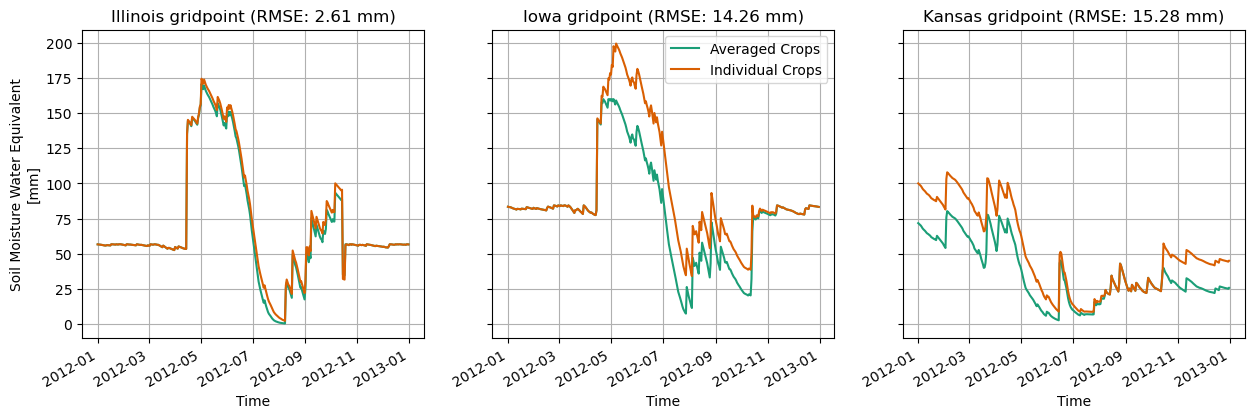

In [4]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

var_id = "soilMoist"

fig, axs = plt.subplots(1,3, figsize=(15,4), sharey=True)

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

# Illinois
ax=axs[0]
lat_sel = 39.61
lon_sel = -87.96
ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Illinois gridpoint (RMSE: %.2f mm)" % rmse)

# Iowa
ax=axs[1]
lat_sel = 41.5
lon_sel = -92.5

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Iowa gridpoint (RMSE: %.2f mm)" % rmse)
ax.set_ylabel("")

# Kansas
ax=axs[2]
lat_sel = 38.8
lon_sel = -98.32

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Kansas gridpoint (RMSE: %.2f mm)" % rmse)
ax.set_ylabel("")

for ax in axs:
    ax.grid()
    
    
# plt.show()
plt.savefig('./figs/timeseries_IL-IA-KS_2012_Hamon_CropCompare.pdf')

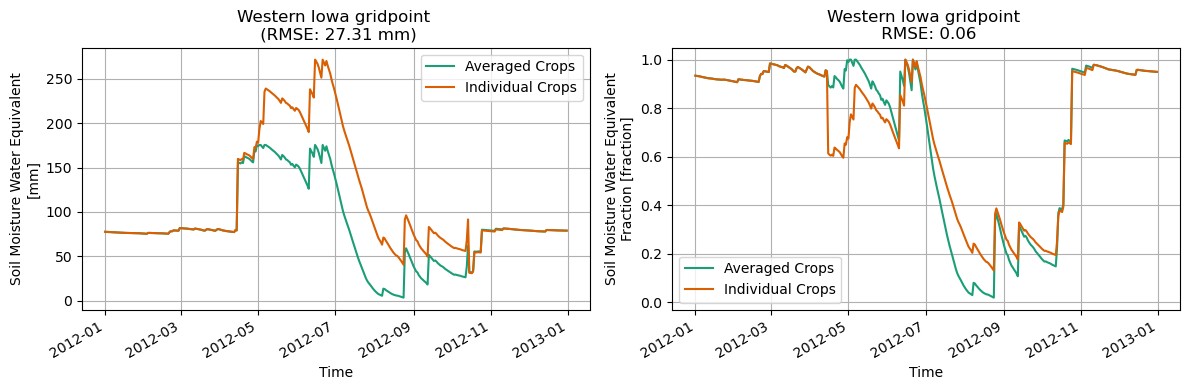

In [9]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

fig, axs = plt.subplots(1,2, figsize=(12,4))

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

# Iowa
var_id = "soilMoist"
ax=axs[0]
lat_sel = 41.5
lon_sel = -95.5

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Western Iowa gridpoint \n (RMSE: %.2f mm)" % rmse)
ax.grid()

ax=axs[1]
var_id = "soilMoistFrac"
lat_sel = 41.5
lon_sel = -95.5

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Western Iowa gridpoint \n RMSE: %.2f" % rmse)
ax.grid()

# plt.show()
plt.tight_layout()
plt.savefig('./figs/timeseries_westernIA_2012_Hamon_CropCompare.pdf')

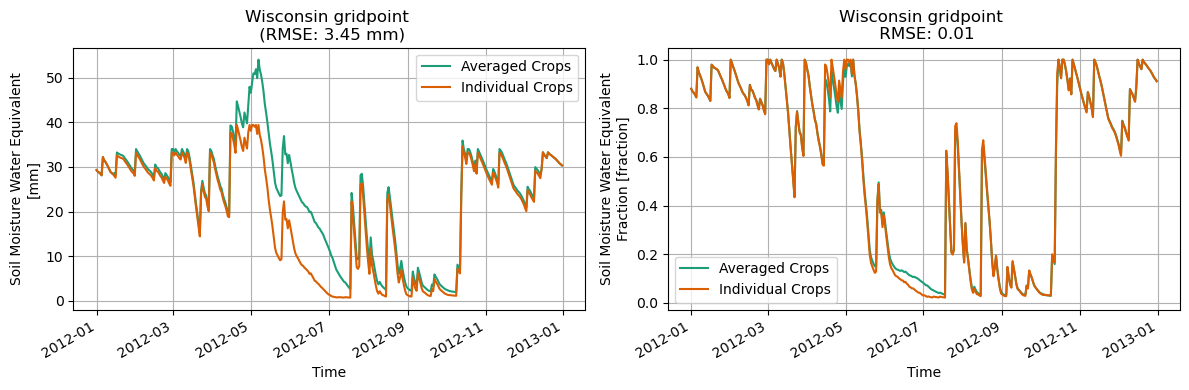

In [10]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

fig, axs = plt.subplots(1,2, figsize=(12,4))

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

lat_sel = 43.5
lon_sel = -89.5

# Wisconsin
var_id = "soilMoist"
ax=axs[0]

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Wisconsin gridpoint \n (RMSE: %.2f mm)" % rmse)
ax.grid()

ax=axs[1]
var_id = "soilMoistFrac"

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Wisconsin gridpoint \n RMSE: %.2f" % rmse)
ax.grid()

# plt.show()
plt.tight_layout()
plt.savefig('./figs/timeseries_Wisconsin_2012_Hamon_CropCompare.pdf')

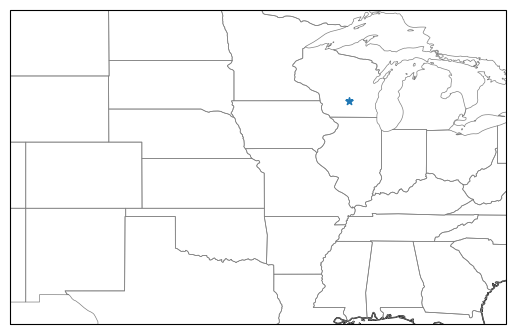

In [11]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

xlims = [-110, -80] # central US
ylims = [30,49] # central US
ax.set_xlim(xlims)
ax.set_ylim(ylims)

ax.scatter([-89.5], [43.5], s=30, marker="*") # IA

# plt.show()
plt.savefig('./figs/map_Wisconsin.pdf')

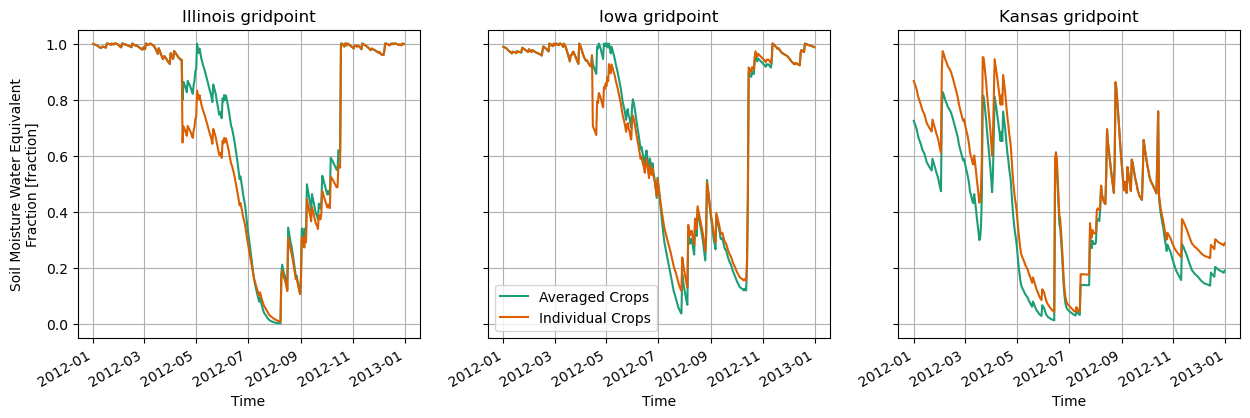

In [7]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

var_id = "soilMoistFrac"

fig, axs = plt.subplots(1,3, figsize=(15,4), sharey=True)

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

# Illinois
ax=axs[0]
lat_sel = 39.61
lon_sel = -87.96
ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.set_title("Illinois gridpoint")

# Iowa
ax=axs[1]
lat_sel = 41.5
lon_sel = -92.5

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
ax.set_title("Iowa gridpoint")
ax.set_ylabel("")

# Kansas
ax=axs[2]
lat_sel = 38.8
lon_sel = -98.32

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.set_title("Kansas gridpoint")
ax.set_ylabel("")

for ax in axs:
    ax.grid()
    
# plt.show()
plt.savefig('./figs/timeseriesFrac_IL-IA-KS_2012_Hamon_CropCompare.pdf')

### Correlation analysis

In [8]:
# Correlation analysis
ds_prism_crop_soilMoist_corr = xr.corr(ds_prism_avg["soilMoist"], ds_prism_ind["soilMoist"], dim="time").compute()
ds_prism_crop_soilMoistFrac_corr = xr.corr(ds_prism_avg["soilMoistFrac"], ds_prism_ind["soilMoistFrac"], dim="time").compute()

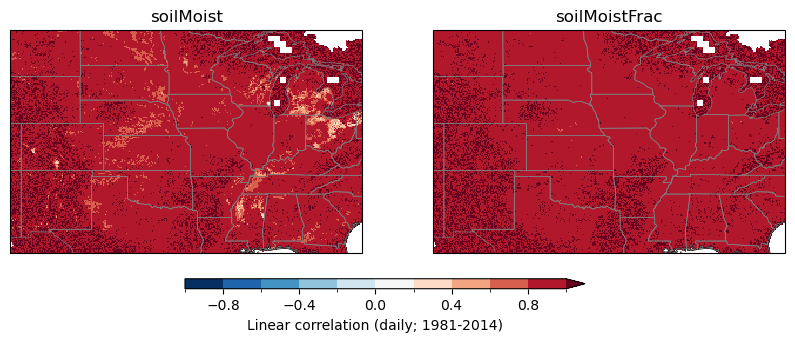

In [9]:
# Plot
fig, axs = plt.subplots(1,2, figsize=(10,5), subplot_kw=dict(projection=ccrs.PlateCarree()))

xlims = [-110, -80] # central US
ylims = [30,49] # central US

ds_prism_crop_soilMoist_corr.plot(ax=axs[0], vmin=-1, vmax=1, cmap="RdBu_r", add_colorbar=False, levels=11)
axs[0].set_title("soilMoist")

p = ds_prism_crop_soilMoistFrac_corr.plot(ax=axs[1], vmin=-1, vmax=1, cmap="RdBu_r", add_colorbar=False, levels=11)
axs[1].set_title("soilMoistFrac")

for ax in axs:
    ax.coastlines()
    ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)

cbar_ax = fig.add_axes([0.3, 0.2, 0.4, 0.02])
cbar = fig.colorbar(p,
                    cax=cbar_ax,
                    orientation="horizontal",
                    label="Linear correlation (daily; 1981-2014)")

plt.savefig('./figs/pearson_CropSetting_1981-2014_Hamon_midwest.png', dpi=600)
# plt.show()

### RMSE

In [12]:
# RMSE
ds_prism_crop_soilMoist_rmse = np.sqrt(((ds_prism_avg["soilMoist"] - ds_prism_ind["soilMoist"])**2)).mean(dim="time").compute()
ds_prism_crop_soilMoistFrac_rmse = np.sqrt(((ds_prism_avg["soilMoistFrac"] - ds_prism_ind["soilMoistFrac"])**2)).mean(dim="time").compute()

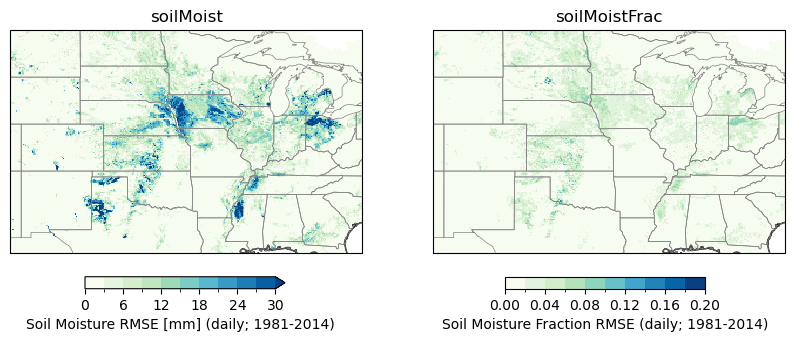

In [13]:
# Plot
fig, axs = plt.subplots(1,2, figsize=(10,6), subplot_kw=dict(projection=ccrs.PlateCarree()))

xlims = [-110, -80] # central US
ylims = [30,49] # central US

p = ds_prism_crop_soilMoist_rmse.plot(ax=axs[0], vmin=0, vmax=30, cmap="GnBu", add_colorbar=False, levels=11)
axs[0].set_title("soilMoist")

cbar_ax = fig.add_axes([0.2, 0.25, 0.2, 0.02])
cbar = fig.colorbar(p,
                    cax=cbar_ax,
                    orientation="horizontal",
                    label="Soil Moisture RMSE [mm] (daily; 1981-2014)")

p = ds_prism_crop_soilMoistFrac_rmse.plot(ax=axs[1], vmin=0, vmax=0.2, cmap="GnBu", add_colorbar=False, levels=11)
axs[1].set_title("soilMoistFrac")

cbar_ax = fig.add_axes([0.62, 0.25, 0.2, 0.02])
cbar = fig.colorbar(p,
                    cax=cbar_ax,
                    orientation="horizontal",
                    label="Soil Moisture Fraction RMSE (daily; 1981-2014)")

for ax in axs:
    ax.coastlines()
    ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)

# plt.show()
plt.savefig('./figs/RMSE_CropSetting_1981-2014_Hamon_midwest.png', dpi=600)

### Ranking

In [14]:
# Above/below instances
ds_prism_crop_soilMoist_bin = (ds_prism_avg["soilMoist"] > ds_prism_ind["soilMoist"]).where(ds_prism_avg["soilMoist"] != ds_prism_ind["soilMoist"]).mean(dim="time").compute()
ds_prism_crop_soilMoistFrac_bin = (ds_prism_avg["soilMoistFrac"] > ds_prism_ind["soilMoistFrac"]).where(ds_prism_avg["soilMoistFrac"] != ds_prism_ind["soilMoistFrac"]).mean(dim="time").compute()

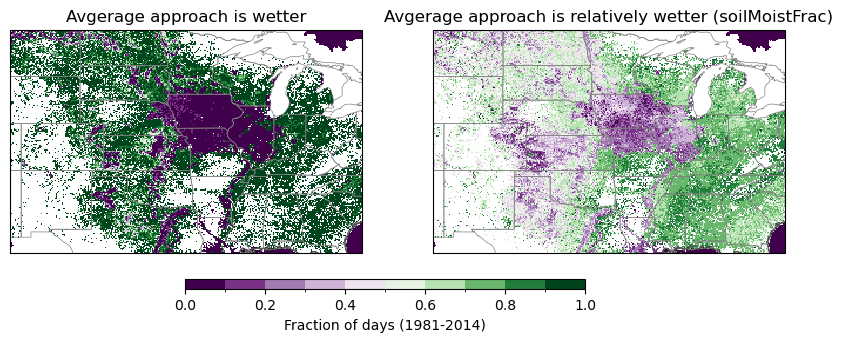

In [15]:
# Plot
fig, axs = plt.subplots(1,2, figsize=(10,5), subplot_kw=dict(projection=ccrs.PlateCarree()))

xlims = [-110, -80] # central US
ylims = [30,49] # central US

ds_prism_crop_soilMoist_bin.plot(ax=axs[0], vmin=0., vmax=1., cmap="PRGn", add_colorbar=False, levels=11)
axs[0].set_title("Avgerage approach is wetter")

p = ds_prism_crop_soilMoistFrac_bin.plot(ax=axs[1], vmin=.0, vmax=1., cmap="PRGn", add_colorbar=False, levels=11)
axs[1].set_title("Avgerage approach is relatively wetter (soilMoistFrac)")

for ax in axs:
    ax.coastlines()
    ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)

cbar_ax = fig.add_axes([0.3, 0.2, 0.4, 0.02])
cbar = fig.colorbar(p,
                    cax=cbar_ax,
                    orientation="horizontal",
                    label="Fraction of days (1981-2014)")

# plt.show()
plt.savefig('./figs/ranking_CropSetting_1981-2014_Hamon_midwest.png', dpi=600)

### What is happening here?

In [12]:
year = "2012"

ds_cdl_rfavg_awCap = xr.open_dataset("/gpfs/group/kaf26/default/private/WBM_data/squam.sr.unh.edu/US_CDL_v3_data/crops/MIRCA_CDL-US-M/awCap_av/" + year + "/MC_rfd_awCap_av.nc")
ds_cdl_maize_frac = xr.open_dataset("/gpfs/group/kaf26/default/private/WBM_data/squam.sr.unh.edu/US_CDL_v3_data/crops/MIRCA_CDL-US-M/crop_fraction/" + year + "/MC_maize_1_rfd_fr.nc")
ds_cdl_soy_frac = xr.open_dataset("/gpfs/group/kaf26/default/private/WBM_data/squam.sr.unh.edu/US_CDL_v3_data/crops/MIRCA_CDL-US-M/crop_fraction/" + year + "/MC_soybeans_1_rfd_fr.nc")

ds_effective_rooting_depth = xr.open_dataset("/gpfs/group/kaf26/default/dcl5300/test-runs_WBM/current/GMFD_soilM_HamonTP_cropAverage/data/Effective_Rooting_Depth_mod.tif")
ds_awCap = xr.open_dataset("/gpfs/group/kaf26/default/private/WBM_data/squam.sr.unh.edu/US_CDL_v3_data/soil/SSURGO_SoilData_awc_frac_mm_m_CONUS_1km.tif")

In [27]:
# Western IA
lat_sel = 41.5
lon_sel = -95.5
print(ds_awCap.sel(y=lat_sel, x=lon_sel, method='nearest')["band_data"].to_numpy()[0])
print(ds_effective_rooting_depth.sel(y=lat_sel, x=lon_sel, method='nearest')["band_data"].to_numpy()[0])

209.15257519
0.37


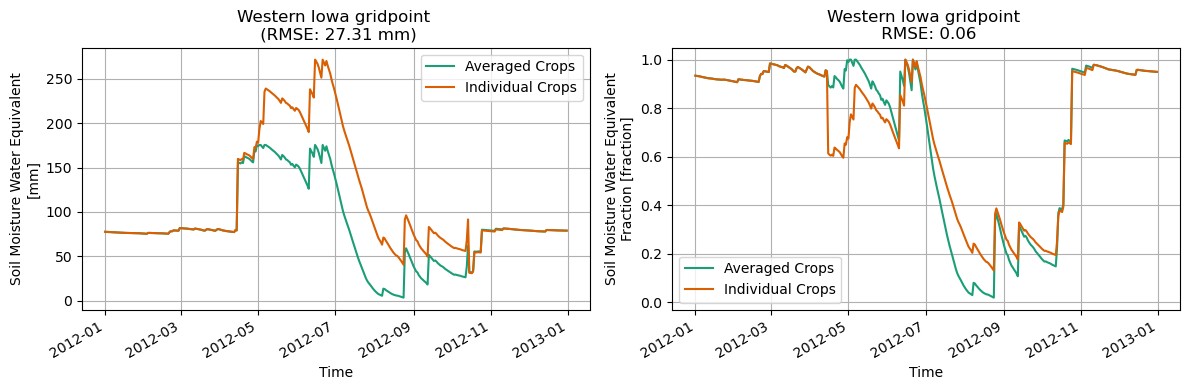

In [36]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

fig, axs = plt.subplots(1,2, figsize=(12,4))

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

# Iowa
var_id = "soilMoist"
ax=axs[0]
lat_sel = 41.5
lon_sel = -95.5

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Western Iowa gridpoint \n (RMSE: %.2f mm)" % rmse)
ax.grid()

ax=axs[1]
var_id = "soilMoistFrac"
lat_sel = 41.5
lon_sel = -95.5

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Western Iowa gridpoint \n RMSE: %.2f" % rmse)
ax.grid()


plt.tight_layout()
# plt.show()
plt.savefig('./figs/timeseries_westernIA_2012_Hamon_CropCompare.pdf')

In [37]:
# IL
lat_sel = 39.61
lon_sel = -87.96
print(ds_awCap.sel(y=lat_sel, x=lon_sel, method='nearest')["band_data"].to_numpy()[0])
print(ds_effective_rooting_depth.sel(y=lat_sel, x=lon_sel, method='nearest')["band_data"].to_numpy()[0])

146.64275635
0.31


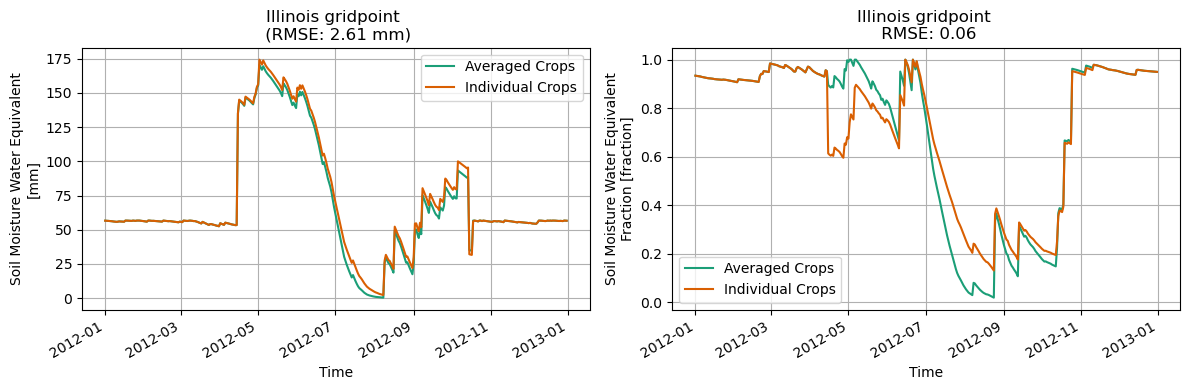

In [38]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

fig, axs = plt.subplots(1,2, figsize=(12,4))

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

# Illinois
var_id = "soilMoist"
ax=axs[0]
lat_sel = 39.61
lon_sel = -87.96

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Illinois gridpoint \n (RMSE: %.2f mm)" % rmse)
ax.grid()

ax=axs[1]
var_id = "soilMoistFrac"
lat_sel = 41.5
lon_sel = -95.5

ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Averaged Crops', color=colors[0], ax=ax)
ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Individual Crops', color=colors[1], ax=ax)
ax.legend()
rmse = np.sqrt(((ds_prism_ind.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id] -\
                 ds_prism_avg.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id])**2)).mean(dim="time")
ax.set_title("Illinois gridpoint \n RMSE: %.2f" % rmse)
ax.grid()


plt.tight_layout()
# plt.show()
plt.savefig('./figs/timeseries_IL_2012_Hamon_CropCompare.pdf')

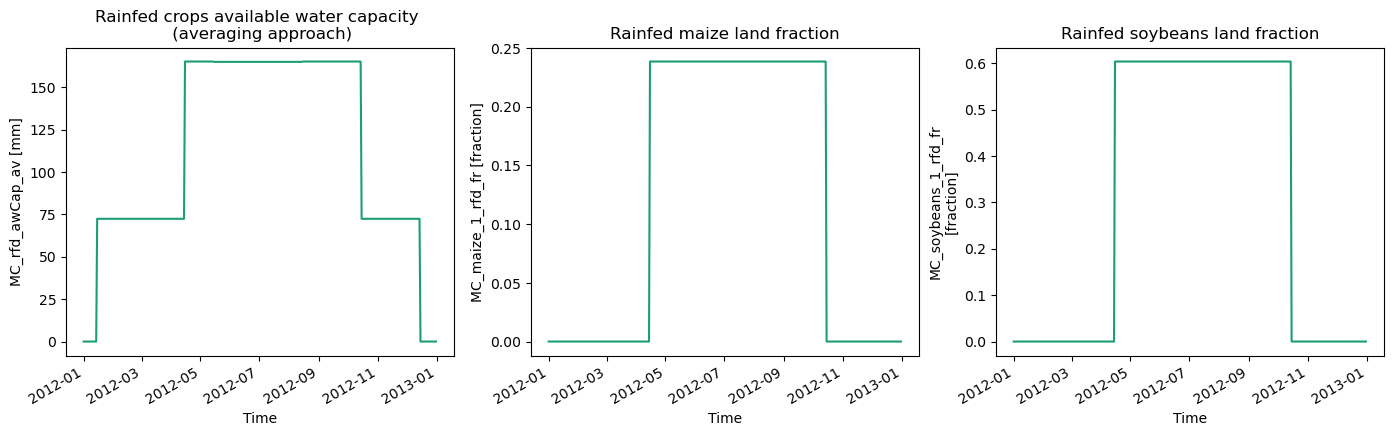

In [17]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

fig, axs = plt.subplots(1,3, figsize=(17,4))

# Iowa
lat_sel = 41.5
lon_sel = -92.5

ds_cdl_rfavg_awCap.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_rfd_awCap_av"].plot(color=colors[0], ax=axs[0])
axs[0].set_title("Rainfed crops available water capacity \n (averaging approach)")

ds_cdl_maize_frac.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_maize_1_rfd_fr"].plot(color=colors[0], ax=axs[1])
axs[1].set_title("Rainfed maize land fraction")

ds_cdl_soy_frac.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_soybeans_1_rfd_fr"].plot(color=colors[0], ax=axs[2])
axs[2].set_title("Rainfed soybeans land fraction")

# plt.show()
plt.savefig('./figs/IA_2012_check.pdf')

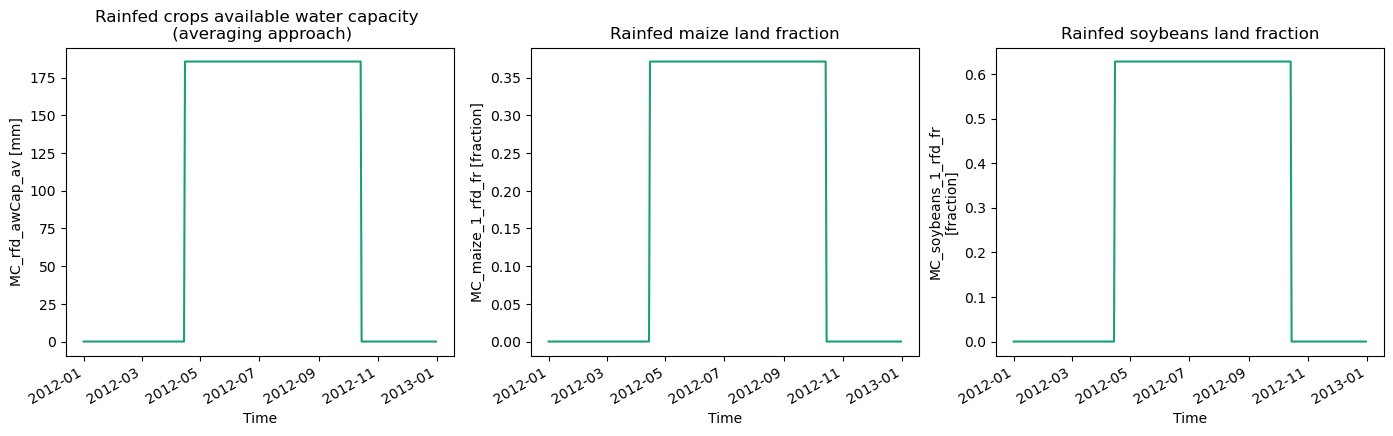

In [28]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

fig, axs = plt.subplots(1,3, figsize=(17,4))

# Illinois
lat_sel = 39.61
lon_sel = -87.96

ds_cdl_rfavg_awCap.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_rfd_awCap_av"].plot(color=colors[0], ax=axs[0])
axs[0].set_title("Rainfed crops available water capacity \n (averaging approach)")

ds_cdl_maize_frac.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_maize_1_rfd_fr"].plot(color=colors[0], ax=axs[1])
axs[1].set_title("Rainfed maize land fraction")

ds_cdl_soy_frac.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_soybeans_1_rfd_fr"].plot(color=colors[0], ax=axs[2])
axs[2].set_title("Rainfed soybeans land fraction")

# plt.show()
plt.tight_layout()
plt.savefig('./figs/IL_2012_check.pdf')

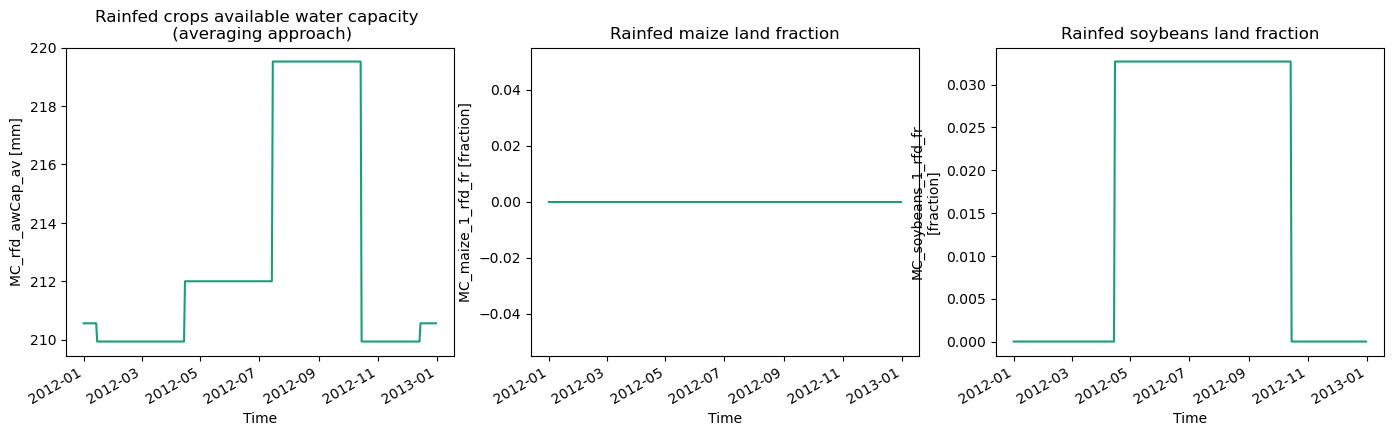

In [19]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

fig, axs = plt.subplots(1,3, figsize=(17,4))

# Kansas
lat_sel = 38.8
lon_sel = -98.32

ds_cdl_rfavg_awCap.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_rfd_awCap_av"].plot(color=colors[0], ax=axs[0])
axs[0].set_title("Rainfed crops available water capacity \n (averaging approach)")

ds_cdl_maize_frac.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_maize_1_rfd_fr"].plot(color=colors[0], ax=axs[1])
axs[1].set_title("Rainfed maize land fraction")

ds_cdl_soy_frac.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_soybeans_1_rfd_fr"].plot(color=colors[0], ax=axs[2])
axs[2].set_title("Rainfed soybeans land fraction")

# plt.show()
plt.savefig('./figs/KS_2012_check.pdf')

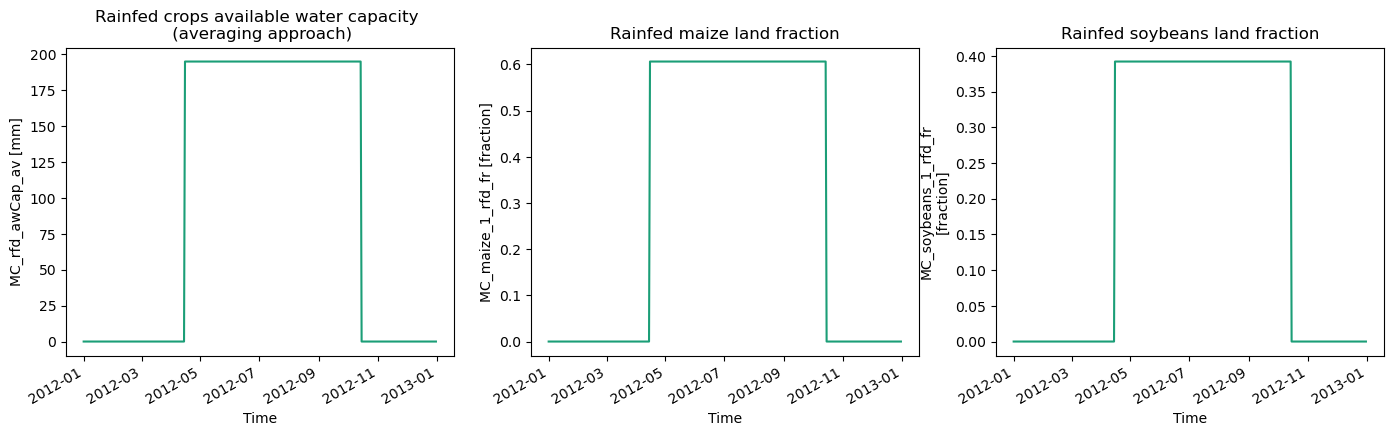

In [20]:
# Timeseries plots
year_sel = "2012"

year_start = year_sel + "-01-01"
year_end = year_sel + "-12-31"

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A"]

fig, axs = plt.subplots(1,3, figsize=(17,4))

# Iowa
lat_sel = 41.5
lon_sel = -95.5

ds_cdl_rfavg_awCap.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_rfd_awCap_av"].plot(color=colors[0], ax=axs[0])
axs[0].set_title("Rainfed crops available water capacity \n (averaging approach)")

ds_cdl_maize_frac.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_maize_1_rfd_fr"].plot(color=colors[0], ax=axs[1])
axs[1].set_title("Rainfed maize land fraction")

ds_cdl_soy_frac.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["MC_soybeans_1_rfd_fr"].plot(color=colors[0], ax=axs[2])
axs[2].set_title("Rainfed soybeans land fraction")

# plt.show()
plt.savefig('./figs/westernIA_2012_check.pdf')

## OLD

In [28]:
# Danielle original
ds_danielle = xr.open_mfdataset("/gpfs/group/kaf26/default/private/WBM_data/merrimack.sr.unh.edu/old_US_CDL_v3/daily/wbm_" + str(year) + ".nc")

In [58]:
# Original runs with old rooting depth file
path_in = "/gpfs/group/kaf26/default/dcl5300/test-runs_WBM/"
year="1982"

ds_Hamon_avgCrop = xr.open_mfdataset(path_in + "old_rootDepth_only_soilM/hindcast_soilM_HamonTP_cropAverage/wbm_output/daily/wbm_" + str(year) + ".nc")
ds_Hamon_indCrop = xr.open_mfdataset(path_in + "old_rootDepth_only_soilM/hindcast_soilM_HamonTP_cropIndividual/wbm_output/daily/wbm_" + str(year) + ".nc")
ds_PM_avgCrop = xr.open_mfdataset(path_in + "old_rootDepth_only_soilM/hindcast_soilM_PM_cropAverage/wbm_output/daily/wbm_" + str(year) + ".nc")
ds_PM_indCrop = xr.open_mfdataset(path_in + "old_rootDepth_only_soilM/hindcast_soilM_PM_cropIndividual/wbm_output/daily/wbm_" + str(year) + ".nc")

# Atieh
ds_atieh = xr.open_dataset('/gpfs/group/kaf26/default/dcl5300/soilMoist_check_WBM/wbm_2000.nc')

# Danielle original
ds_danielle = xr.open_mfdataset("/gpfs/group/kaf26/default/private/WBM_data/merrimack.sr.unh.edu/old_US_CDL_v3/daily/wbm_" + str(year) + ".nc")

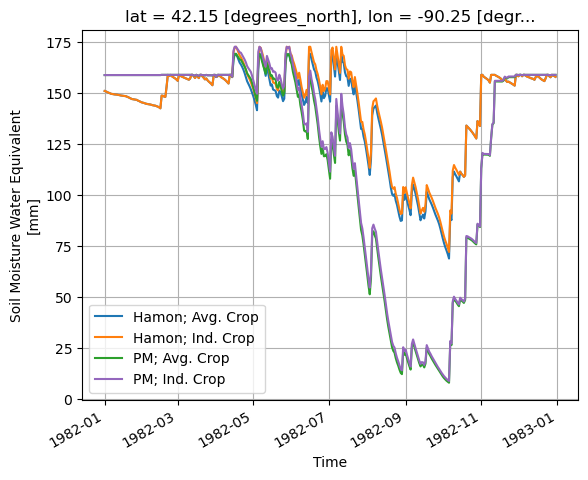

In [59]:
year_start = "1982-01-01"
year_end = "1982-12-31"
lat_sel = 42.11
lon_sel = -90.22

fig, ax = plt.subplots()

var_id = "soilMoist"

ds_Hamon_avgCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Hamon; Avg. Crop', color="C0")
ds_Hamon_indCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Hamon; Ind. Crop', color="C1")
ds_PM_avgCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PM; Avg. Crop', color="C2")
ds_PM_indCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PM; Ind. Crop', color="C4")

# ds_atieh.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PM; Avg. Crop (Atieh)', color="gray")
# ds_danielle.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["Maize_1_rfdCrop_soilMoistFrac"].plot(label='PM; Ind. Crop (Danielle)', color="black")

ax.grid()
ax.legend()
plt.show()

In [39]:
# New runs with new rooting depth file
path_in = "/gpfs/group/kaf26/default/dcl5300/test-runs_WBM/"
year="1982"

ds_Hamon_avgCrop = xr.open_mfdataset(path_in + "current/hindcast_soilM_HamonTP_cropAverage/wbm_output/daily/wbm_" + str(year) + ".nc")
ds_Hamon_indCrop = xr.open_mfdataset(path_in + "current/hindcast_soilM_HamonTP_cropIndividual/wbm_output/daily/wbm_" + str(year) + ".nc")
ds_PM_avgCrop = xr.open_mfdataset(path_in + "current/hindcast_soilM_PM_cropAverage/wbm_output/daily/wbm_" + str(year) + ".nc")
ds_PM_indCrop = xr.open_mfdataset(path_in + "current/hindcast_soilM_PM_cropIndividual/wbm_output/daily/wbm_" + str(year) + ".nc")

ds_Hamon_avgCrop_LAI = xr.open_mfdataset(path_in + "current/PRISM-test_soilM_HamonTP_cropAverage/wbm_output/daily/wbm_" + str(year) + ".nc")

In [44]:
# Danielle original
ds_danielle = xr.open_mfdataset("/gpfs/group/kaf26/default/private/WBM_data/merrimack.sr.unh.edu/old_US_CDL_v3/daily/wbm_" + str(year) + ".nc")

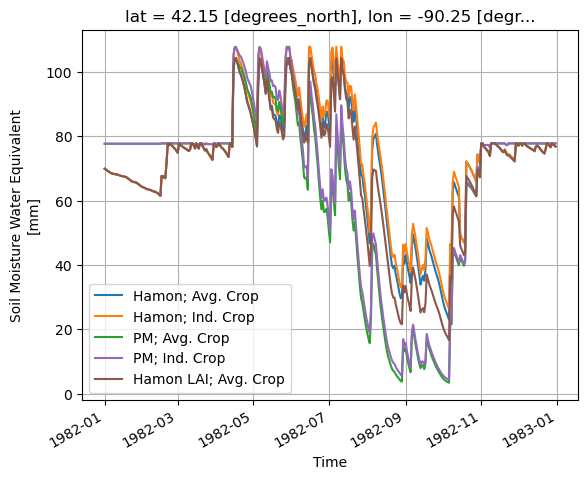

In [55]:
year_start = "1982-01-01"
year_end = "1982-12-31"
lat_sel = 42.11
lon_sel = -90.22

fig, ax = plt.subplots()

var_id = "soilMoist"

ds_Hamon_avgCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Hamon; Avg. Crop', color="C0")
ds_Hamon_indCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Hamon; Ind. Crop', color="C1")
ds_PM_avgCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PM; Avg. Crop', color="C2")
ds_PM_indCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PM; Ind. Crop', color="C4")

ds_Hamon_avgCrop_LAI.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Hamon LAI; Avg. Crop', color="C5")

# ds_atieh.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PM; Avg. Crop (Atieh)', color="gray")
# ds_danielle.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["Maize_1_rfdCrop_soilMoistFrac"].plot(label='PM; Ind. Crop (Danielle)', color="black")

ax.grid()
ax.legend()
plt.show()

In [ ]:
year_start = "1982-01-01"
year_end = "1982-12-31"
lat_sel = 42.11
lon_sel = -88.22

fig, ax = plt.subplots()

var_id = "soilMoistFrac"

ds_Hamon_avgCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Hamon; Avg. Crop', color="C0")
ds_Hamon_indCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Hamon; Ind. Crop', color="C1")
ds_PM_avgCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PM; Avg. Crop', color="C2")
ds_PM_indCrop.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PM; Ind. Crop', color="C4")

ds_Hamon_avgCrop_LAI.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='Hamon LAI; Avg. Crop', color="C5")

# ds_atieh.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))[var_id].plot(label='PM; Avg. Crop (Atieh)', color="gray")
# ds_danielle.sel(lat=lat_sel, lon=lon_sel, method='nearest').sel(time=slice(year_start,year_end))["Maize_1_rfdCrop_soilMoistFrac"].plot(label='PM; Ind. Crop (Danielle)', color="black")

ax.grid()
ax.legend()
plt.show()z

In [23]:
# Merge
ds = xr.merge([ds_Hamon_avgCrop.rename({'soilMoist':'Hamon_avgCrop'}),
               ds_Hamon_indCrop.rename({'soilMoist':'Hamon_indCrop'}),
               ds_PM_avgCrop.rename({'soilMoist':'PM_avgCrop'}),
               ds_PM_indCrop.rename({'soilMoist':'PM_indCrop'})])

In [6]:
# Get correlations
ds['Hamon_avgCrop--Hamon_indCrop'] = xr.corr(ds['Hamon_avgCrop'], ds["Hamon_indCrop"], dim="time").compute()
ds['Hamon_avgCrop--PM_avgCrop'] = xr.corr(ds['Hamon_avgCrop'], ds["PM_avgCrop"], dim="time").compute()
ds['Hamon_avgCrop--PM_indCrop'] = xr.corr(ds['Hamon_avgCrop'], ds["PM_indCrop"], dim="time").compute()

ds['Hamon_indCrop--PM_avgCrop'] = xr.corr(ds['Hamon_indCrop'], ds["PM_avgCrop"], dim="time").compute()
ds['Hamon_indCrop--PM_indCrop'] = xr.corr(ds['Hamon_indCrop'], ds["PM_indCrop"], dim="time").compute()

ds['PM_indCrop--PM_avgCrop'] = xr.corr(ds['PM_indCrop'], ds["PM_avgCrop"], dim="time").compute()

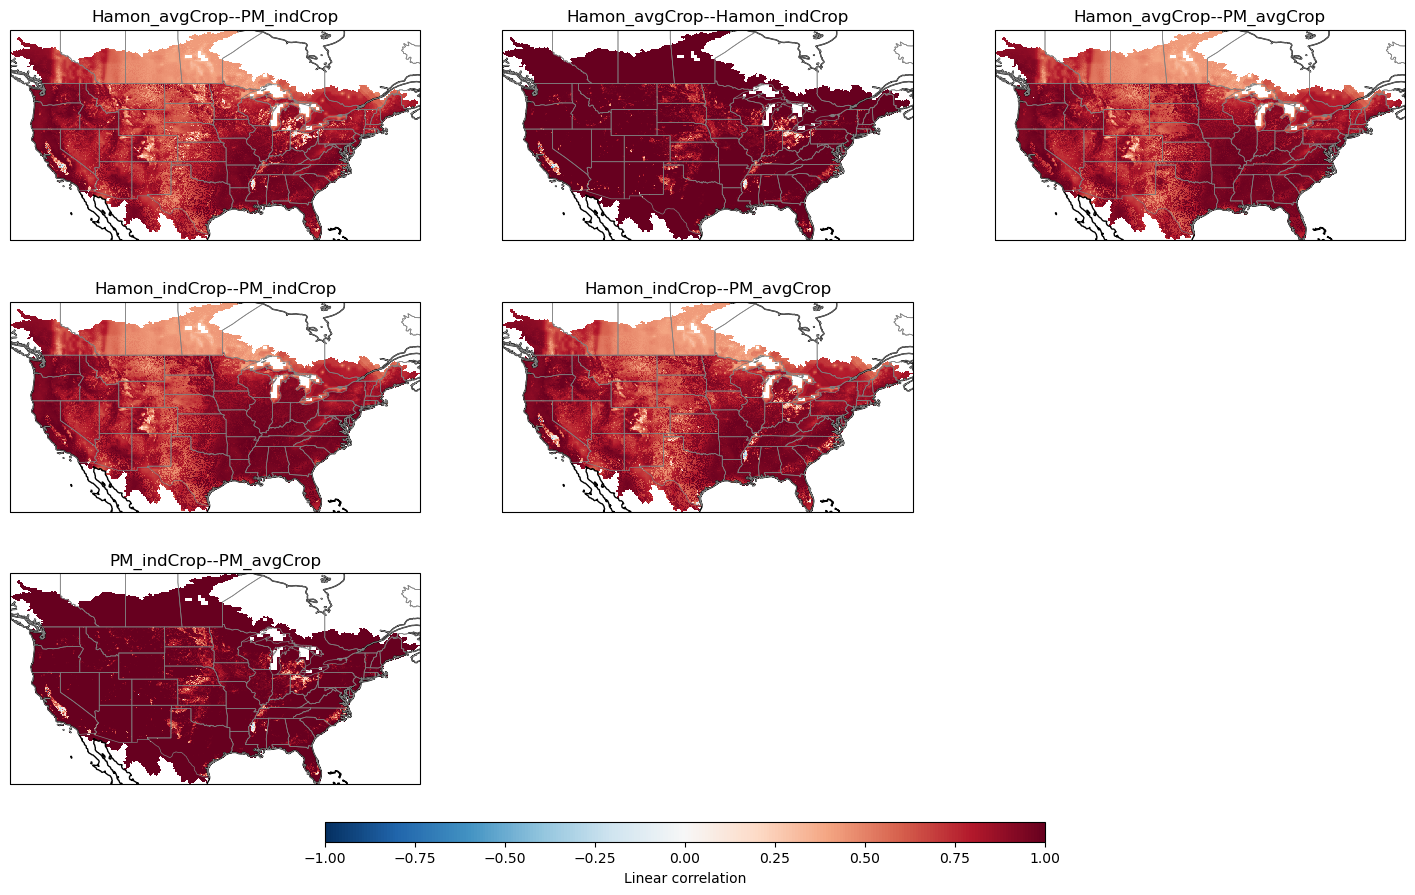

In [57]:
# Plot
fig, axs = plt.subplots(3,3, figsize=(18,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

ds['Hamon_avgCrop--PM_indCrop'].plot(ax=axs[0,0], vmin=-1., vmax=1., add_colorbar=False, cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[0,0].set_title('Hamon_avgCrop--PM_indCrop')
axs[0,0].coastlines()
axs[0,0].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds['Hamon_avgCrop--Hamon_indCrop'].plot(ax=axs[0,1], vmin=-1., vmax=1., add_colorbar=False, cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[0,1].set_title('Hamon_avgCrop--Hamon_indCrop')
axs[0,1].coastlines()
axs[0,1].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds['Hamon_avgCrop--PM_avgCrop'].plot(ax=axs[0,2], vmin=-1., vmax=1., add_colorbar=False, cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[0,2].set_title('Hamon_avgCrop--PM_avgCrop')
axs[0,2].coastlines()
axs[0,2].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds['Hamon_indCrop--PM_indCrop'].plot(ax=axs[1,0], vmin=-1., vmax=1., add_colorbar=False, cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[1,0].set_title('Hamon_indCrop--PM_indCrop')
axs[1,0].coastlines()
axs[1,0].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds['Hamon_indCrop--PM_avgCrop'].plot(ax=axs[1,1], vmin=-1., vmax=1., add_colorbar=False, cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[1,1].set_title('Hamon_indCrop--PM_avgCrop')
axs[1,1].coastlines()
axs[1,1].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

p = ds['PM_indCrop--PM_avgCrop'].plot(ax=axs[2,0], vmin=-1., vmax=1., add_colorbar=False, cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[2,0].set_title('PM_indCrop--PM_avgCrop')
axs[2,0].coastlines()
axs[2,0].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

axs[1,2].axis('off')
axs[2,1].axis('off')
axs[2,2].axis('off')

cbar_ax = fig.add_axes([0.3, 0.06, 0.4, 0.02])
cbar = fig.colorbar(
    p,
    cax=cbar_ax,
    orientation="horizontal",
    label="Linear correlation",
)

plt.savefig('./lincorr_comparison_1980-2015.png', dpi=600)

In [49]:
# Get RMSE
ds_rmse = ds.copy()

ds_rmse['Hamon_avgCrop--Hamon_indCrop'] = np.sqrt(((ds_rmse['Hamon_avgCrop'] - ds_rmse["Hamon_indCrop"])**2)).mean(dim="time").compute()
ds_rmse['Hamon_avgCrop--PM_avgCrop'] = np.sqrt(((ds_rmse['Hamon_avgCrop'] - ds_rmse["PM_avgCrop"])**2)).mean(dim="time").compute()
ds_rmse['Hamon_avgCrop--PM_indCrop'] = np.sqrt(((ds_rmse['Hamon_avgCrop'] - ds_rmse["PM_indCrop"])**2)).mean(dim="time").compute()

ds_rmse['Hamon_indCrop--PM_avgCrop'] = np.sqrt(((ds_rmse['Hamon_indCrop'] - ds_rmse["PM_avgCrop"])**2)).mean(dim="time").compute()
ds_rmse['Hamon_indCrop--PM_indCrop'] = np.sqrt(((ds_rmse['Hamon_indCrop'] - ds_rmse["PM_indCrop"])**2)).mean(dim="time").compute()

ds_rmse['PM_indCrop--PM_avgCrop'] = np.sqrt(((ds_rmse['PM_indCrop'] - ds_rmse["PM_avgCrop"])**2)).mean(dim="time").compute()

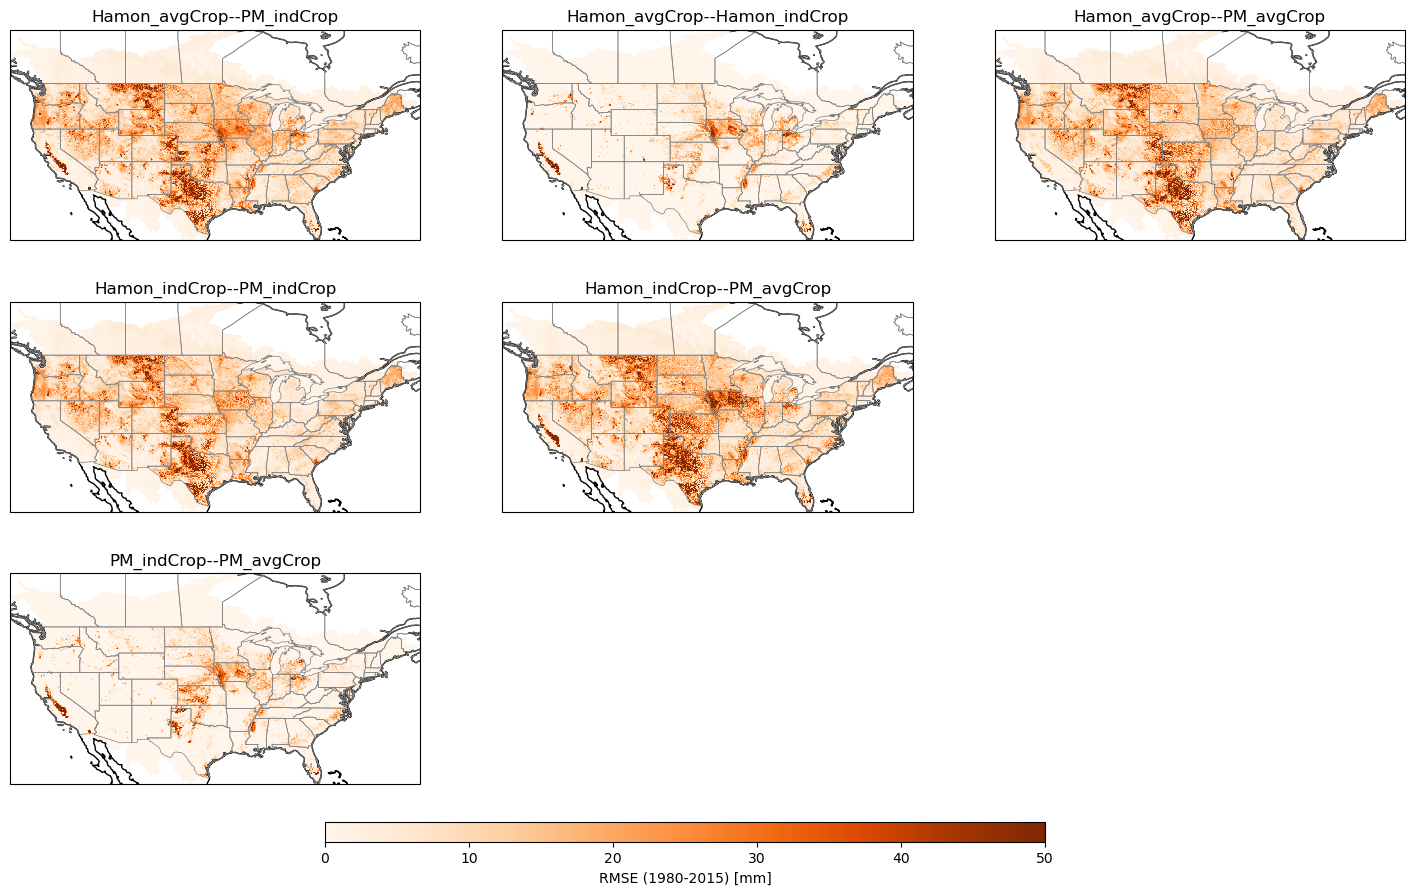

In [58]:
# Plot
fig, axs = plt.subplots(3,3, figsize=(18,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

ds_rmse['Hamon_avgCrop--PM_indCrop'].plot(ax=axs[0,0], vmin=0., vmax=50., add_colorbar=False, cmap="Oranges", transform=ccrs.PlateCarree())
axs[0,0].set_title('Hamon_avgCrop--PM_indCrop')
axs[0,0].coastlines()
axs[0,0].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds_rmse['Hamon_avgCrop--Hamon_indCrop'].plot(ax=axs[0,1], vmin=0., vmax=50., add_colorbar=False, cmap="Oranges", transform=ccrs.PlateCarree())
axs[0,1].set_title('Hamon_avgCrop--Hamon_indCrop')
axs[0,1].coastlines()
axs[0,1].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds_rmse['Hamon_avgCrop--PM_avgCrop'].plot(ax=axs[0,2], vmin=0., vmax=50., add_colorbar=False, cmap="Oranges", transform=ccrs.PlateCarree())
axs[0,2].set_title('Hamon_avgCrop--PM_avgCrop')
axs[0,2].coastlines()
axs[0,2].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds_rmse['Hamon_indCrop--PM_indCrop'].plot(ax=axs[1,0], vmin=0., vmax=50., add_colorbar=False, cmap="Oranges", transform=ccrs.PlateCarree())
axs[1,0].set_title('Hamon_indCrop--PM_indCrop')
axs[1,0].coastlines()
axs[1,0].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds_rmse['Hamon_indCrop--PM_avgCrop'].plot(ax=axs[1,1], vmin=0., vmax=50., add_colorbar=False, cmap="Oranges", transform=ccrs.PlateCarree())
axs[1,1].set_title('Hamon_indCrop--PM_avgCrop')
axs[1,1].coastlines()
axs[1,1].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

p = ds_rmse['PM_indCrop--PM_avgCrop'].plot(ax=axs[2,0], vmin=0., vmax=50., add_colorbar=False, cmap="Oranges", transform=ccrs.PlateCarree())
axs[2,0].set_title('PM_indCrop--PM_avgCrop')
axs[2,0].coastlines()
axs[2,0].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

axs[1,2].axis('off')
axs[2,1].axis('off')
axs[2,2].axis('off')

cbar_ax = fig.add_axes([0.3, 0.06, 0.4, 0.02])
cbar = fig.colorbar(
    p,
    cax=cbar_ax,
    orientation="horizontal",
    label="RMSE (1980-2015) [mm]",
)

plt.savefig('./rmse_comparison_1980-2015.png', dpi=600)

In [24]:
# Get binary differences
ds_bin = ds.copy()

ds_bin['Hamon_avgCrop_gt_Hamon_indCrop'] = (ds_bin['Hamon_avgCrop'] > ds_bin["Hamon_indCrop"]).mean(dim="time").compute()
ds_bin['Hamon_avgCrop_gt_PM_avgCrop'] = (ds_bin['Hamon_avgCrop'] > ds_bin["PM_avgCrop"]).mean(dim="time").compute()
ds_bin['Hamon_avgCrop_gt_PM_indCrop'] = (ds_bin['Hamon_avgCrop'] > ds_bin["PM_indCrop"]).mean(dim="time").compute()

ds_bin['Hamon_indCrop_gt_PM_avgCrop'] = (ds_bin['Hamon_indCrop'] > ds_bin["PM_avgCrop"]).mean(dim="time").compute()
ds_bin['Hamon_indCrop_gt_PM_indCrop'] = (ds_bin['Hamon_indCrop'] > ds_bin["PM_indCrop"]).mean(dim="time").compute()

ds_bin['PM_avgCrop_gt_PM_indCrop'] = (ds_bin['PM_avgCrop'] > ds_bin["PM_indCrop"]).mean(dim="time").compute()

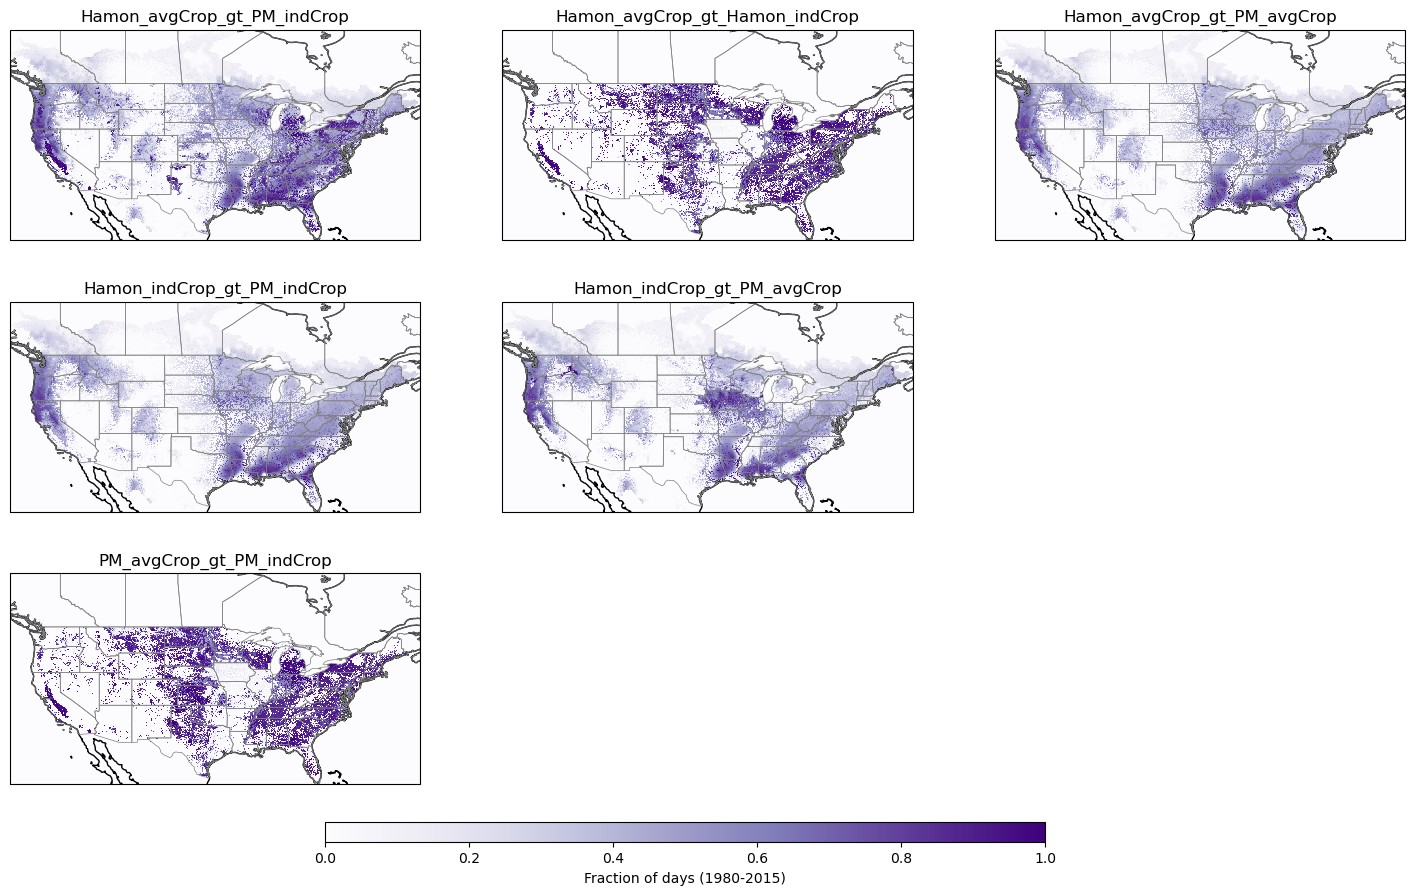

In [25]:
# Plot
fig, axs = plt.subplots(3,3, figsize=(18,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

ds_bin['Hamon_avgCrop_gt_PM_indCrop'].plot(ax=axs[0,0], vmin=0., vmax=1., add_colorbar=False, cmap="Purples", transform=ccrs.PlateCarree())
axs[0,0].set_title('Hamon_avgCrop_gt_PM_indCrop')
axs[0,0].coastlines()
axs[0,0].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds_bin['Hamon_avgCrop_gt_Hamon_indCrop'].plot(ax=axs[0,1], vmin=0., vmax=1., add_colorbar=False, cmap="Purples", transform=ccrs.PlateCarree())
axs[0,1].set_title('Hamon_avgCrop_gt_Hamon_indCrop')
axs[0,1].coastlines()
axs[0,1].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds_bin['Hamon_avgCrop_gt_PM_avgCrop'].plot(ax=axs[0,2], vmin=0., vmax=1., add_colorbar=False, cmap="Purples", transform=ccrs.PlateCarree())
axs[0,2].set_title('Hamon_avgCrop_gt_PM_avgCrop')
axs[0,2].coastlines()
axs[0,2].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds_bin['Hamon_indCrop_gt_PM_indCrop'].plot(ax=axs[1,0], vmin=0., vmax=1., add_colorbar=False, cmap="Purples", transform=ccrs.PlateCarree())
axs[1,0].set_title('Hamon_indCrop_gt_PM_indCrop')
axs[1,0].coastlines()
axs[1,0].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

ds_bin['Hamon_indCrop_gt_PM_avgCrop'].plot(ax=axs[1,1], vmin=0., vmax=1., add_colorbar=False, cmap="Purples", transform=ccrs.PlateCarree())
axs[1,1].set_title('Hamon_indCrop_gt_PM_avgCrop')
axs[1,1].coastlines()
axs[1,1].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

p = ds_bin['PM_avgCrop_gt_PM_indCrop'].plot(ax=axs[2,0], vmin=0., vmax=1., add_colorbar=False, cmap="Purples", transform=ccrs.PlateCarree())
axs[2,0].set_title('PM_avgCrop_gt_PM_indCrop')
axs[2,0].coastlines()
axs[2,0].add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)

axs[1,2].axis('off')
axs[2,1].axis('off')
axs[2,2].axis('off')

cbar_ax = fig.add_axes([0.3, 0.06, 0.4, 0.02])
cbar = fig.colorbar(
    p,
    cax=cbar_ax,
    orientation="horizontal",
    label="Fraction of days (1980-2015)",
)

plt.savefig('./binary_comparison_1980-2015.png', dpi=600)